In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wavelet import *
%matplotlib inline

(1000, 2)


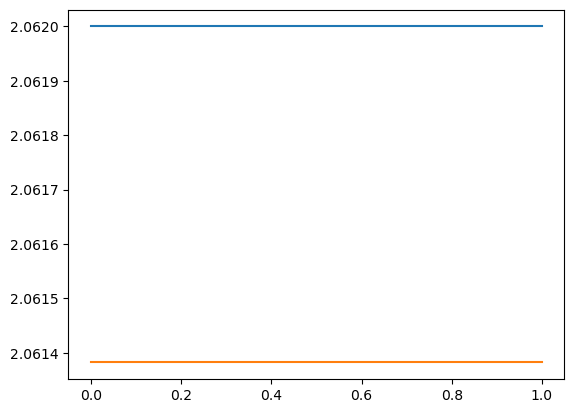

In [3]:
t = np.linspace(0,10,1000)
Y = np.array([np.sin(2*np.pi*2*t),np.sin(2*np.pi*2*t)]).T
print(np.shape(Y))
analysis = FrequencyAnalysis(n_freqs=10000, fsample=100, fmin=0.5, fmax=10)(Y)
plt.plot(analysis['frequency'][1])
plt.plot(analysis['frequency'][0])
plt.show()

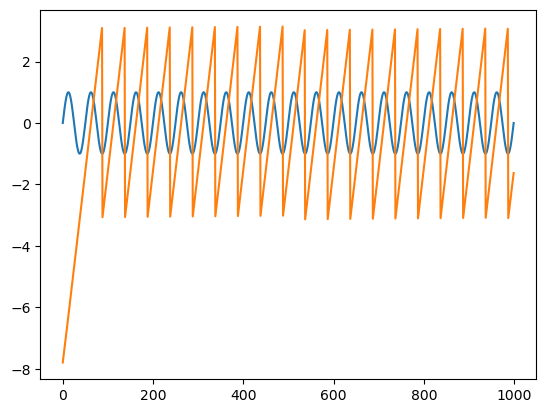

In [5]:
pa = PhaseAna()
phase = pa.getPhase(Y[:,0])
plt.plot(Y[:,0])
plt.plot(phase)
plt.show()

In [96]:
print(analysis)
print(phase)

{'amplitude': array([[0.02934708, 0.02934708],
       [0.02948835, 0.02948835],
       [0.03469938, 0.03469938],
       ...,
       [0.33440235, 0.33440235],
       [0.31009414, 0.31009414],
       [0.29622143, 0.29622143]]), 'frequency': array([[4.27564349, 4.27564349],
       [4.28079951, 4.28079951],
       [7.79212221, 7.79212221],
       ...,
       [7.37189697, 7.37189697],
       [7.68024244, 7.68024244],
       [7.83921844, 7.83921844]]), 'phase': array([[ 0.01471198,  0.01471198],
       [-0.81494176, -0.81494176],
       [-1.64459549, -1.64459549],
       ...,
       [ 1.25570964,  1.25570964],
       [-0.60888782, -0.60888782],
       [-0.60888782, -0.60888782]]), 'phase_diff': array([0., 0., 0., ..., 0., 0., 0.])}
[-4.52000142 -4.37841628 -4.2025276  ...  1.19666047  1.3710377
  1.54829759]


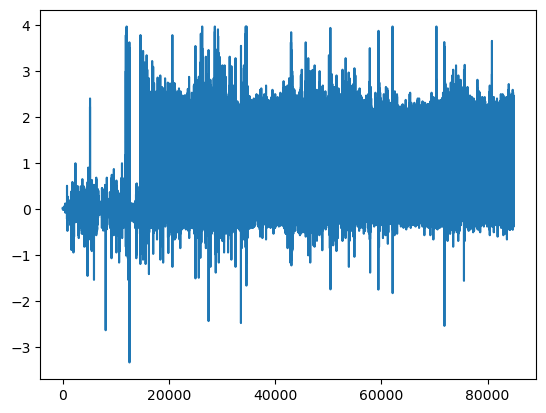

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv("Filename_selection_split#5_0.txt", sep="\t", index_col='Time')

# Process the first three columns and label them
df1 = df.iloc[:, :3]
df1.columns = ['x', 'y', 'z']

# Calculate the mean for static acceleration in each axis
mean_x, mean_y, mean_z = df1.mean()

# Calculate dynamic acceleration
dynamic_x = df1['x'] - mean_x
dynamic_y = df1['y'] - mean_y
dynamic_z = df1['z'] - mean_z

# Calculate ODBA
ODBA = np.abs(dynamic_x) + np.abs(dynamic_y) + np.abs(dynamic_z)

# Calculate VeDBA
VeDBA = np.sqrt(dynamic_x**2 + dynamic_y**2 + dynamic_z**2)

# Add ODBA and VeDBA to the DataFrame
df1['ODBA'] = ODBA
df1['VeDBA'] = VeDBA


Plot variables

In [ ]:
z = df1['z']
# Convert Z to a NumPy array if it's not already
Z = np.array(z)

# Ensure Z is one-dimensional
Z = Z.flatten()

# Plot the 'z' channel with limited data points on the x-axis (from 1 to 1000)
plt.plot(Z)

plt.show()

In [ ]:
# Assuming analysis['frequency'], analysis['amplitude'], and analysis['phase'] are available
z = na.array(df1['z']).flatten()
ODBA = na.array(df1['ODBA']).flatten()
VeDBA = na.array(df1['VeDBA']).flatten()

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 8))  # 3 rows, 1 column

# Define unique colors for each plot
colors = ['blue', 'green', 'red']

# Frequency plot
axs[0].plot(z, color=colors[0], linewidth=0.1)
axs[0].set_title('z')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('z')

# Amplitude plot
axs[1].plot(ODBA, color=colors[1], linewidth=0.1)
axs[1].set_title('ODBA')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('ODBA')

# Phase plot
axs[2].plot(VeDBA, color=colors[2], linewidth=0.01)
axs[2].set_title('VeDBA')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('VeDBA')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


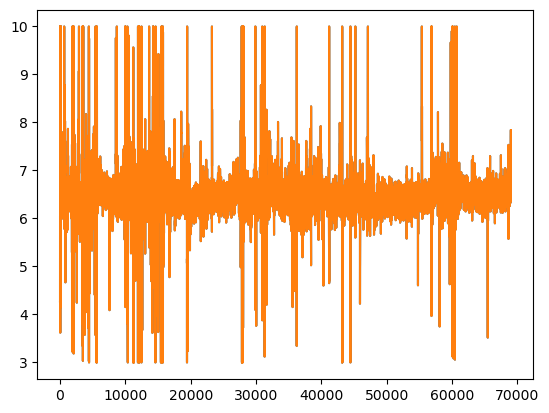

In [67]:

# Extract a segment of the 'z' column
Z = df1['z'][15000:84000]

# Convert to NumPy array
Y = Z.to_numpy()

# Duplicate the array to create a 2D array with two identical columns
Y_2D = np.column_stack((Y, Y))

# Frequency analysis
analysis = FrequencyAnalysis(n_freqs=1000, fsample=25, fmin=3, fmax=10)(Y_2D)

# Plotting
plt.plot(analysis['frequency'][:])
# plt.plot(analysis['frequency'][0])
plt.show()

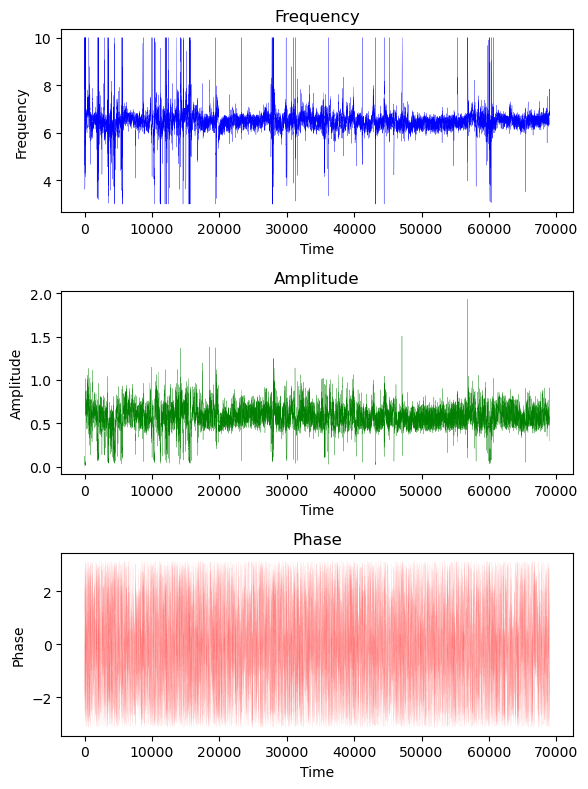

In [101]:
import matplotlib.pyplot as plt

# Assuming analysis['frequency'], analysis['amplitude'], and analysis['phase'] are available
frequency_data = analysis['frequency']
amplitude_data = analysis['amplitude']
phase_data = analysis['phase']  # Assuming 'phase' is a key in your 'analysis' dictionary

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 8))  # 3 rows, 1 column

# Define unique colors for each plot
colors = ['blue', 'green', 'red']

# Frequency plot
axs[0].plot(frequency_data, color=colors[0], linewidth=0.1)
axs[0].set_title('Frequency')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Frequency')

# Amplitude plot
axs[1].plot(amplitude_data, color=colors[1], linewidth=0.1)
axs[1].set_title('Amplitude')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')

# Phase plot
axs[2].plot(phase_data, color=colors[2], linewidth=0.01)
axs[2].set_title('Phase')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Phase')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


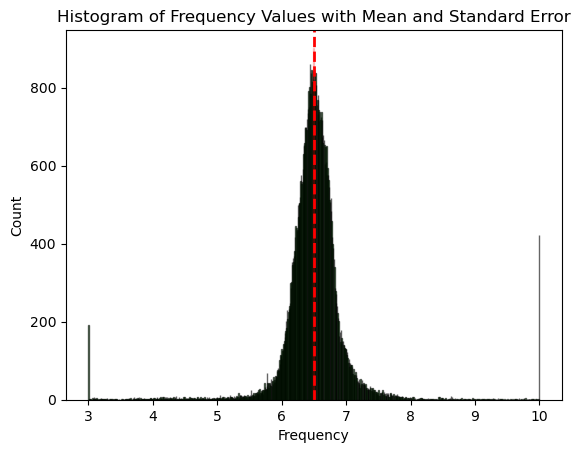

In [86]:
# Assuming analysis['frequency'] is your frequency data
frequency_data = analysis['frequency'][:,0]
amplitude_data = analysis['amplitude'][:,0]

# Calculate mean and standard deviation
mean = np.mean(frequency_data)
std_dev = np.std(frequency_data)

# Calculate the standard error
standard_error = std_dev / np.sqrt(len(frequency_data))

# Plotting the histogram
plt.hist(frequency_data, bins=1000, alpha=0.6, color='g', edgecolor='black')

# Adding mean line
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2)

# Adding standard error shaded area
plt.fill_betweenx([0, plt.ylim()[1]], mean - standard_error, mean + standard_error, color='red', alpha=0.2)

# Adding labels and title
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Histogram of Frequency Values with Mean and Standard Error')

# Display the plot
plt.show()

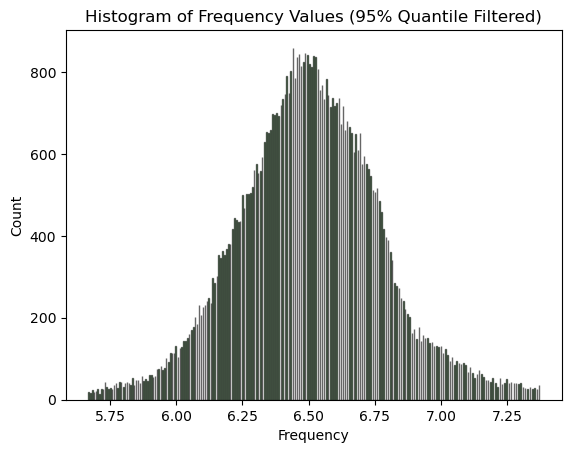

In [92]:
import scipy.stats as stats

# Calculate the 2.5th and 97.5th percentiles
lower_quantile, upper_quantile = np.percentile(frequency_data, [2.5, 97.5])

# Replace values outside the quantile range with NaNs
frequency_data_filtered = np.where(
    (frequency_data >= lower_quantile) & (frequency_data <= upper_quantile),
    frequency_data,
    np.nan
)
# Plotting the histogram of the filtered data
plt.hist(frequency_data_filtered, bins=1000, alpha=0.6, color='g', edgecolor='black')

# Adding labels and title
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Histogram of Frequency Values (95% Quantile Filtered)')

# Display the plot
plt.show()

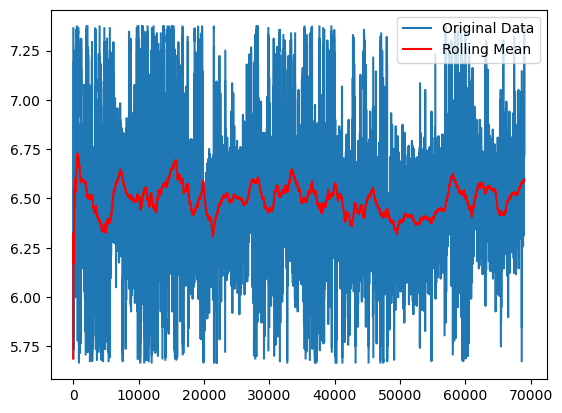

In [90]:
# Convert your frequency data to a Pandas Series
# frequency_series = pd.Series(analysis['frequency'][:, 0])
frequency_series = pd.Series(frequency_data_filtered)
window_size = 25*60 # 4 seconds
# Compute the rolling mean - choose an appropriate window size
rolling_mean = frequency_series.rolling(window=window_size, min_periods=1).mean()

# Plotting
plt.plot(frequency_series, label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean', color='red')

# Adding legend
plt.legend()

# Display the plot
plt.show()


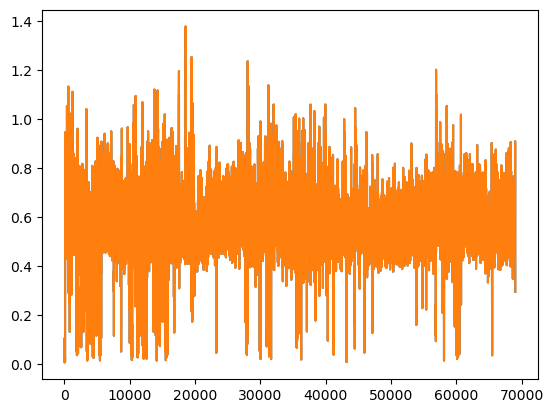

In [64]:
# Plotting
plt.plot(analysis['amplitude'][:])
# plt.plot(analysis['frequency'][0])
plt.show()


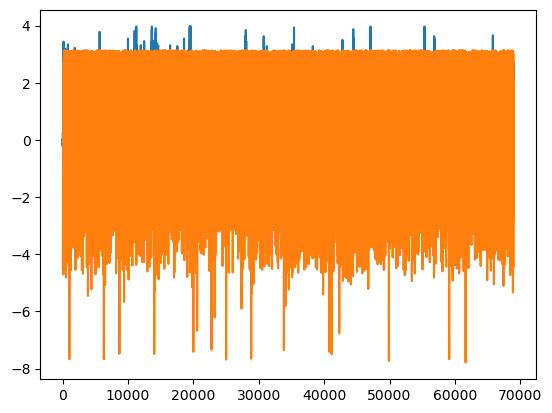

In [65]:
pa = PhaseAna()
phase = pa.getPhase(Y)
plt.plot(Y)
plt.plot(phase)
plt.show()

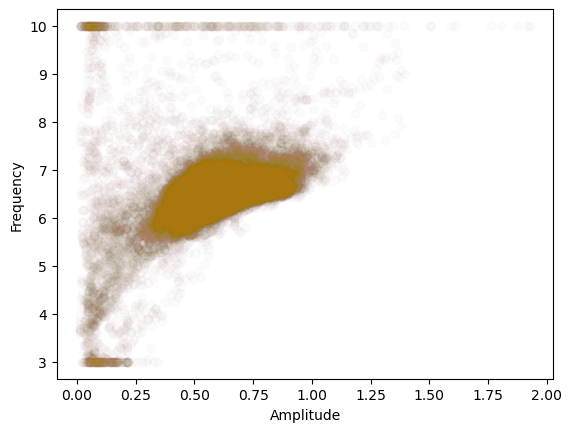

In [104]:
plt.plot(analysis['amplitude'][:], analysis['frequency'][:], 'o', alpha=0.01)  # 'o' for points

# Adding axis labels
plt.xlabel('Amplitude')
plt.ylabel('Frequency')

# Display the plot
plt.show()